In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'birdclef-2023:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-competitions-data%2Fkaggle-v2%2F44224%2F5188730%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240517%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240517T113450Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D8bc6de3b10a5ec78c4baab27d47fe230481f8d5aa790f2586c2b6672fbc99133a3d277ccb62194fa8cb456dffde6a885e67fc1b6321ba0d290a67a795186e2a3e334fd07ad6f773a5c125446803ed3ec736e826859e33d86bf05496901a1e12aaa08ecf07f138fd884b1844481540ccdaf3a4ddc9f31a461a2132ed6926a15528ec95852b4699488d89514fb45093864c2a6f6b55b56b88c909da81b9b1bb999c97aa6cc03064303c33d2a52d9727c955bb93c6b068f9763cd834a1345bf998708f5c4a67a4e1011bd9df1cef7786342e786cb695bfaf226233f77092254db4410059a9b14f59523b19aa3fa470a1723419b4bd0ede098ab5401fe6e3de97876'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


In [ ]:
import os

In [ ]:
import sklearn

In [ ]:
if (not os.path.exists(("/kaggle/working/librosa_cache"))):
    os.mkdir("/kaggle/working/librosa_cache")

In [ ]:
!export LIBROSA_CACHE_DIR=/kaggle/working/librosa_cache

In [ ]:
import librosa
import tensorflow as tf

2024-05-14 17:00:12.803895: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-14 17:00:12.804040: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-14 17:00:12.987111: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
class CFG:
    device = 'CPU'
    seed = 42

    # Input image size and batch size
    img_size = [128, 512]
    batch_size = 64
    upsample_thr = 30 # min sample of each class (upsample)
    cv_filter = True # always keeps low sample data in train

    # Audio duration, sample rate, and length
    duration = 10 # second
    sample_rate = 16000
    audio_len = duration*sample_rate

    # STFT parameters
    nfft = 1024
    window = 1024
    hop_length = 512
    fmin = 20
    fmax = 8000
    normalize = True
    nmels = 216

    # Inference batch size, test time augmentation, and drop remainder
    infer_bs = 2
    tta = 1
    drop_remainder = True

    # Number of epochs, model name, and number of folds
    epochs = 25
    model_name = 'EfficientNetB1'
    fsr = False # reduce stride of stem block
    num_fold = 5

    # Selected folds for training and evaluation
    selected_folds = [0]

    # Pretraining, neck features, and final activation function
    pretrain = 'imagenet'
    neck_features = 0
    final_act = 'softmax'

    # Learning rate, optimizer, and scheduler
    lr = 1e-3
    scheduler = 'cos'
    optimizer = 'Adam' # AdamW, Adam

    # Loss function and label smoothing
    loss = 'CCE' # BCE, CCE
    label_smoothing = 0.05 # label smoothing

    # Data augmentation parameters
    augment=True

    # Time Freq masking
    freq_mask_prob=0.50
    num_freq_masks=1
    freq_mask_param=10
    time_mask_prob=0.50
    num_time_masks=2
    time_mask_param=25

    # Audio Augmentation Settings
    audio_augment_prob = 0.5

    mixup_prob = 0.65
    mixup_alpha = 0.5

    cutmix_prob = 0.65
    cutmix_alpha = 2.5

    timeshift_prob = 0.0

    gn_prob = 0.35

    # Class Labels for BirdCLEF 23
    class_names = sorted(set(os.listdir('/kaggle/input/birdclef-2023/train_audio/')))
    num_classes = len(class_names)
    class_labels = list(range(num_classes))
    label2name = dict(zip(class_labels, class_names))
    name2label = {v:k for k,v in label2name.items()}

    # Training Settings
    target_col = ['target']
    tab_cols = ['filename']
    monitor = 'auc'
    debug = True
    verbose = 0

In [ ]:
tf.keras.utils.set_random_seed(CFG.seed)

In [ ]:
def load_clef23():
    base = "/kaggle/input/birdclef-2023"
    df_23 = pd.read_csv(f'{base}/train_metadata.csv')
    df_23['filepath'] = base + '/train_audio/' + df_23['filename']
    df_23['filename'] = df_23['filename'].map(lambda x: x.split('/')[-1])
    df_23['dataset'] = 'clef23'
    df_23['target'] = df_23.primary_label.map(CFG.name2label).astype('int32')
    return df_23

In [ ]:
def librosa_load(filepath:str, sr):
    return librosa.load(filepath, sr=sr)

In [ ]:
df = load_clef23()

In [ ]:
df.head()

,primary_label,secondary_labels,type,latitude,longitude,scientific_name,common_name,author,license,rating,url,filename,filepath,dataset,target
0,abethr1,[],['song'],4.3906,38.2788,Turdus tephronotus,African Bare-eyed Thrush,Rolf A. de By,Creative Commons Attribution-NonCommercial-Sha...,4.0,https://www.xeno-canto.org/128013,XC128013.ogg,/kaggle/input/birdclef-2023/train_audio/abethr...,clef23,0
1,abethr1,[],['call'],-2.9524,38.2921,Turdus tephronotus,African Bare-eyed Thrush,James Bradley,Creative Commons Attribution-NonCommercial-Sha...,3.5,https://www.xeno-canto.org/363501,XC363501.ogg,/kaggle/input/birdclef-2023/train_audio/abethr...,clef23,0
2,abethr1,[],['song'],-2.9524,38.2921,Turdus tephronotus,African Bare-eyed Thrush,James Bradley,Creative Commons Attribution-NonCommercial-Sha...,3.5,https://www.xeno-canto.org/363502,XC363502.ogg,/kaggle/input/birdclef-2023/train_audio/abethr...,clef23,0
3,abethr1,[],['song'],-2.9524,38.2921,Turdus tephronotus,African Bare-eyed Thrush,James Bradley,Creative Commons Attribution-NonCommercial-Sha...,5.0,https://www.xeno-canto.org/363503,XC363503.ogg,/kaggle/input/birdclef-2023/train_audio/abethr...,clef23,0
4,abethr1,[],"['call', 'song']",-2.9524,38.2921,Turdus tephronotus,African Bare-eyed Thrush,James Bradley,Creative Commons Attribution-NonCommercial-Sha...,4.5,https://www.xeno-canto.org/363504,XC363504.ogg,/kaggle/input/birdclef-2023/train_audio/abethr...,clef23,0


In [ ]:
def librosa_load(filepath:str, sr):
    return librosa.load(filepath, sr=sr)

In [ ]:
def upsample_data(df, thr=20):
    # get the class distribution
    class_dist = df['primary_label'].value_counts()

    # identify the classes that have less than the threshold number of samples
    down_classes = class_dist[class_dist < thr].index.tolist()

    # create an empty list to store the upsampled dataframes
    up_dfs = []

    # loop through the undersampled classes and upsample them
    for c in down_classes:
        # get the dataframe for the current class
        class_df = df.query("primary_label==@c")
        # find number of samples to add
        num_up = thr - class_df.shape[0]
        # upsample the dataframe
        class_df = class_df.sample(n=num_up, replace=True, random_state=CFG.seed)
        # append the upsampled dataframe to the list
        up_dfs.append(class_df)

    # concatenate the upsampled dataframes and the original dataframe
    up_df = pd.concat([df] + up_dfs, axis=0, ignore_index=True)

    return up_df

In [ ]:
df.shape

(16941, 15)

In [ ]:
df = upsample_data(df)

In [ ]:
df.shape

(17861, 15)

In [ ]:
import shutil

In [ ]:
if (os.path.exists(("/kaggle/working/train"))):
    shutil.rmtree("/kaggle/working/train")
if (os.path.exists(("/kaggle/working/test"))):
    shutil.rmtree("/kaggle/working/test")
if (os.path.exists(("/kaggle/working/val"))):
    shutil.rmtree("/kaggle/working/val")

In [ ]:
os.makedirs("train", exist_ok=True)
os.makedirs("val", exist_ok=True)
os.makedirs("test", exist_ok=True)


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
audio = df['filepath']
labels = df['primary_label']

In [ ]:
train_audios, test_val_audios, train_labels, test_val_labels = train_test_split(
    audio, labels, test_size=0.3, stratify=labels, random_state=42
)

# Further split test_val into test and validation sets (adjust ratio as needed)
test_audios, val_audios, test_labels, val_labels = train_test_split(
    test_val_audios, test_val_labels, test_size=0.15, stratify=test_val_labels, random_state=42
)

In [ ]:
np.unique(train_labels).shape,np.unique(test_labels).shape, np.unique(val_labels).shape

((264,), (264,), (264,))

In [ ]:
def get_melspectrogram(audio, sr):
    spec = librosa.feature.melspectrogram(y=audio, sr=CFG.sample_rate,
                                       n_mels=CFG.nmels,
                                       n_fft=CFG.nfft,
                                       hop_length=CFG.hop_length,
                                       fmax=CFG.fmax,
                                       fmin=CFG.fmin,
                                       )
    spec = librosa.power_to_db(spec, ref=np.max)
    normalised_db = sklearn.preprocessing.minmax_scale(spec)
    return normalised_db

In [ ]:
from multiprocessing import Pool
import time
from PIL import Image

In [ ]:
audio, sr = librosa_load(df.iloc[0].filepath, sr=CFG.sample_rate)

In [ ]:
spec = get_melspectrogram(audio, sr)

In [ ]:
db_array = (np.asarray(spec)*255).astype(np.uint8)
db_image =  Image.fromarray(np.array([db_array, db_array, db_array]).T)

In [ ]:
import matplotlib.pyplot as plt

def display_image(image_array):
    plt.imshow(image_array)
    plt.axis('off')  # Turn off axis
    plt.show()

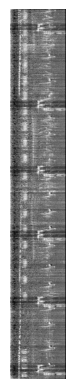

In [ ]:
display_image(db_image)

In [ ]:
def get_chunk(data, num_chunks):
    audio, labels = data
    chunk_size = len(audio) // num_chunks
    if num_chunks > len(data):
        yield (audio, labels)
    else:
        for i in range(0, len(audio), chunk_size):
            chunk = (audio[i : i + chunk_size], labels[i : i + chunk_size])
            yield chunk

In [ ]:
folder = "train"
label = df.iloc[0].primary_label
path = df.iloc[0].filepath
filename = path.split('/')[-1]
filename = filename.split('.')[0]
filename += ".tif"
save_path = f"/kaggle/working/{folder}/{label}/{filename}"
print(save_path)

/kaggle/working/train/abethr1/XC128013.tif


In [ ]:
def f(data):
    tmp, folder = data
    paths, labels = tmp
    x = len(paths)
    for i in range(x):
        path = paths.iloc[i]
        label = labels.iloc[i]
        audio, sr = librosa_load(path, 16000)
        spec = get_melspectrogram(audio, sr)
        filename = path.split('/')[-1]
        filename = filename.split('.')[0]
        filename += ".tif"
        savedir = f"/kaggle/working/{folder}/{label}"
        if (not os.path.exists(savedir)):
            os.makedirs(savedir, exist_ok=True)
        save_path = f"/kaggle/working/{folder}/{label}/{filename}"
        db_array = (np.asarray(spec)*255).astype(np.uint8)
        db_image =  Image.fromarray(np.array([db_array, db_array, db_array]).T)
        db_image.save(save_path)


In [ ]:
def process_chunk(data, folder):
    chunks = [(data_subarray, folder) for data_subarray in get_chunk(data, 40)]
    with Pool(4) as p:
        p.map(f, chunks)

In [ ]:
outer_chunks = 20
for i, chunk in enumerate(get_chunk((train_audios, train_labels), outer_chunks)):
    print("processing", i)
    process_chunk(chunk, "train")

processing 0


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


processing 1
processing 2
processing 3
processing 4
processing 5
processing 6
processing 7
processing 8
processing 9
processing 10
processing 11
processing 12
processing 13
processing 14
processing 15
processing 16
processing 17
processing 18
processing 19
processing 20


ValueError: range() arg 3 must not be zero

In [ ]:
test_audios.shape, val_audios.shape

((4555,), (804,))

In [ ]:
outer_chunks = 20
for i, chunk in enumerate(get_chunk((test_audios, test_labels), outer_chunks)):
    print("processing", i)
    process_chunk(chunk, "test")

processing 0


In [ ]:
outer_chunks = 20
for i, chunk in enumerate(get_chunk((val_audios, val_labels), outer_chunks)):
    print("processing", i)
    process_chunk(chunk, "val")

processing 0


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


In [ ]:
!find /kaggle/working -mindepth 1 -type f -name "*.tif" -printf x | wc -c

17203


In [ ]:
!zip -r dataset.zip /kaggle/working/val /kaggle/working/train /kaggle/working/test

^C
